Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,ANY,Would_live_in_another_neighborhood,District,Gender,Place_of_birth,Time_living_in_barri,Barri_evolution,BCN_evolution,Barri_future,BCN_future,...,House_size,Monthly_family_income,Social_class,Living_alone,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_citizen_security
0,2008,0.0,CIUTAT VELLA,1,BARCELONA,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT IS THE SAME,IT IS WORSE,IT WILL STAY THE SAME,IT WILL GET WORSE,...,< 50 M2,< 1000 EUROS,MIDDLE-MIDDLE,ONE,0,0,0,0,0,0
1,2008,0.0,CIUTAT VELLA,1,REST OF SPAIN,MORE THAN 10 YEARS,IT IS THE SAME,IT HAS IMPROVED,IT WILL IMPROVE,IT WILL IMPROVE,...,51-100 M2,< 1000 EUROS,LOW,TWO,1,0,0,0,0,0
3,2008,0.0,CIUTAT VELLA,0,REST OF CATALONIA,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS WORSE,IT WILL IMPROVE,IT WILL GET WORSE,...,51-100 M2,1001-2000 EUROS,MIDDLE-LOW,THREE,0,0,0,0,0,0
5,2008,0.0,CIUTAT VELLA,0,BARCELONA,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT IS THE SAME,IT IS WORSE,IT WILL IMPROVE,IT WILL STAY THE SAME,...,51-100 M2,< 1000 EUROS,MIDDLE-LOW,THREE,0,0,0,0,0,0
6,2008,0.0,CIUTAT VELLA,1,BARCELONA,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT IS WORSE,IT IS WORSE,IT WILL GET WORSE,IT WILL GET WORSE,...,51-100 M2,< 1000 EUROS,LOW,ONE,0,0,1,0,0,0


In [5]:
data.shape

(15091, 40)

In [6]:
# Dataset is imbalanced
data.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    13454
1.0     1637
dtype: int64

In [7]:
data.columns.tolist()

['ANY',
 'Would_live_in_another_neighborhood',
 'District',
 'Gender',
 'Place_of_birth',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction_of_living',
 'BCN_satisfaction_of_living',
 'Barri_citizen_security',
 'BCN_citizen_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'URBANISM',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION',
 'BUS',
 'SUBWAY',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'BCN_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security']

In [8]:
x_var = data.columns.tolist()

In [9]:
for i in ['ANY',
          'Would_live_in_another_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport',
          'BCN_citizen_security', 'BCN_management']:
    x_var.remove(i)

In [10]:
x = data[x_var]

In [11]:
y = data['Would_live_in_another_neighborhood']

In [12]:
x = pd.get_dummies(x, drop_first=True)

In [13]:
x = sm.add_constant(x)

In [14]:
resampling = TomekLinks()
columns = x.columns
x_resampled, y_resampled = resampling.fit_sample(x, y)
x_resampled = pd.DataFrame(data=x_resampled, columns=columns )
y_resampled= pd.DataFrame(data=y_resampled, columns=['Would_live_in_another_neighborhood'])

print("length of oversampled data is ",len(x_resampled))
print("Number of people who would not stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==1]))
print("Number of people who would stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==0]))
print("Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==1])/len(x_resampled))
print("Proportion of subscription data in resampled data is",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==0])/len(x_resampled))

length of oversampled data is  14760
Number of people who would not stay in the neighborhood in resampled data 1637
Number of people who would stay in the neighborhood in resampled data 13123
Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is 0.11090785907859078
Proportion of subscription data in resampled data is 0.8890921409214092


In [15]:
x_resampled

,const,Gender,Owns_a_car,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_citizen_security,District_EIXAMPLE,...,Monthly_family_income_> 3000 EUROS,Monthly_family_income_I DON'T KNOW / NO ANSWER,Social_class_I DON'T KNOW,Social_class_LOW,Social_class_MIDDLE-HIGH,Social_class_MIDDLE-LOW,Social_class_MIDDLE-MIDDLE,Living_alone_ONE,Living_alone_THREE,Living_alone_TWO
0,1.0,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1.0,1,0.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.0,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1.0,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1.0,1,0.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14755,1.0,1,1.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
14756,1.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
14757,1.0,0,1.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
14758,1.0,0,1.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [16]:
y_resampled['Would_live_in_another_neighborhood'].unique()

array([0., 1.])

In [17]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.279299
         Iterations 8
                                            Results: Logit
Model:                      Logit                                    Pseudo R-squared:       0.198    
Dependent Variable:         Would_live_in_another_neighborhood       AIC:                    8390.9003
Date:                       2021-05-02 12:54                         BIC:                    8945.6767
No. Observations:           14760                                    Log-Likelihood:         -4122.5  
Df Model:                   72                                       LL-Null:                -5142.5  
Df Residuals:               14687                                    LLR p-value:            0.0000   
Converged:                  1.0000                                   Scale:                  1.0000   
No. Iterations:             8.0000                                                                    
---------------

In [18]:
result.pvalues.sort_values(ascending=False)

BCN_over_barri_citizen_security            9.971142e-01
House_size_> 150 M2                        9.689949e-01
Barri_management_NEITHER BAD, NOR GOOD     8.957761e-01
District_HORTA - GUINARDÓ                  8.821859e-01
SUBWAY_NEITHER BAD, NOR GOOD               8.796353e-01
                                               ...     
Time_living_in_barri_MORE THAN 10 YEARS    2.076337e-13
Place_of_birth_REST OF SPAIN               2.952318e-15
Barri_comparison_ONE OF THE WORST          4.813091e-17
Time_living_in_barri_LESS THAN 10 YEARS    1.206470e-33
Barri_comparison_ONE OF THE BEST           1.194028e-79
Length: 73, dtype: float64

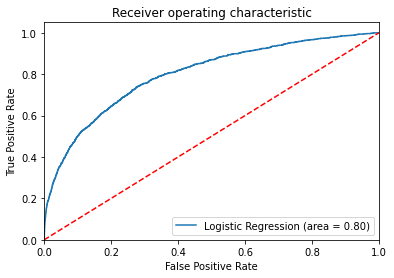

In [19]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
# NIE POPRAWIŁAM PONIŻSZEGO FEATURE SELECTION

In [ ]:
for i in ['MUNICIPAL POLICE_GOOD', 'CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD', 'BCN_over_barri_future', 
          'Gender', 'Barri_transport_GOOD']:
    del x_resampled[i]

In [ ]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

In [ ]:
result.pvalues.sort_values(ascending=False)

In [ ]:
print(result.get_margeff().summary())

In [ ]:
result.pred_table()

In [ ]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()